In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
helper = imp.load_source('helpfunction','/home/tmettler/Desktop/uBoone/do_plots/helpfunction.py')
globale = imp.load_source('globale','/home/tmettler/Desktop/uBoone/do_plots/globale.py')
#import /home/tmettler/Desktop/uBoone/do_plots/helpfunction as helper
import collections
NuCC = imp.load_source('NuCC_function','/home/tmettler/Desktop/uBoone/do_plots/NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function','/home/tmettler/Desktop/uBoone/do_plots/NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_weighted_theta/' 
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
filename_overlay = 'NuCCana_overlay_V26_weight.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_data_V22.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     8.649e+18  # best with tor875
data_trigger = 1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	989745
Data: Number of Entries:	33178
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		8.649e+18
Ext:		0
Overlay:	1.24025430537e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0976176954382
Overlay:	0.00697356982562
Dirt:		0.0691811002835


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out33.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out33.root'
    filename_ext = filename_ext+'out33.root'
    filename_dirt = filename_dirt+'out33.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	989714
Data: Number of Entries:	33177
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40807



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 6.34870e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [13]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
eff , pur = NuCC_w.printEff_w(cut)

Efficiency for cut:  fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	11.24%	 reject:	88.76%
Keep of    dirt:	18.73%	 reject:	81.27%
Keep of overlay:	56.53%	 reject:	43.47%

Efficiency:		50.85%
Purity:			71.77%
Purity*Efficiency	36.49

Amount of     ext:	10.67%
Amount of    dirt:	2.47%
Amount of overlay:	86.87%

Signal definition=  numu_lowpur: 2.67%
Signal definition=   numu_other: 0.77%
Signal definition=    numu_nomu: 2.69%
Signal definition=      numu_ov: 5.60%
Signal definition=  numu_signal: 71.77%
Signal definition=      numu_nc: 3.36%


Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [14]:
# calculate total flux integrated cross section:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+'&& numu_signal')*scale_out[overlay_out]

h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',1000,0,100)
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()

N_dirt = N_dirt*dirt_pass_weight
N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff/100.0*beam_flux*N_tot)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal

print 'Total integrated cross section:', sigma_tot

sigma_tot_MC = (N_signal)/(eff/100.0*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC

Number of data: 1446
Number of ext: 157.945431219
Number of dirt: 36.520081854
Number of overlay: 234.655385197
Number of overlay signal: 1062.20781359
Total integrated cross section: 7.6770041506e-39
Total integrated cross section for MC: 8.01921662059e-39


In [15]:
from array import array

#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1
h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))


Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//png/h_eff_trueTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//root/h_eff_trueTheta.root has been created


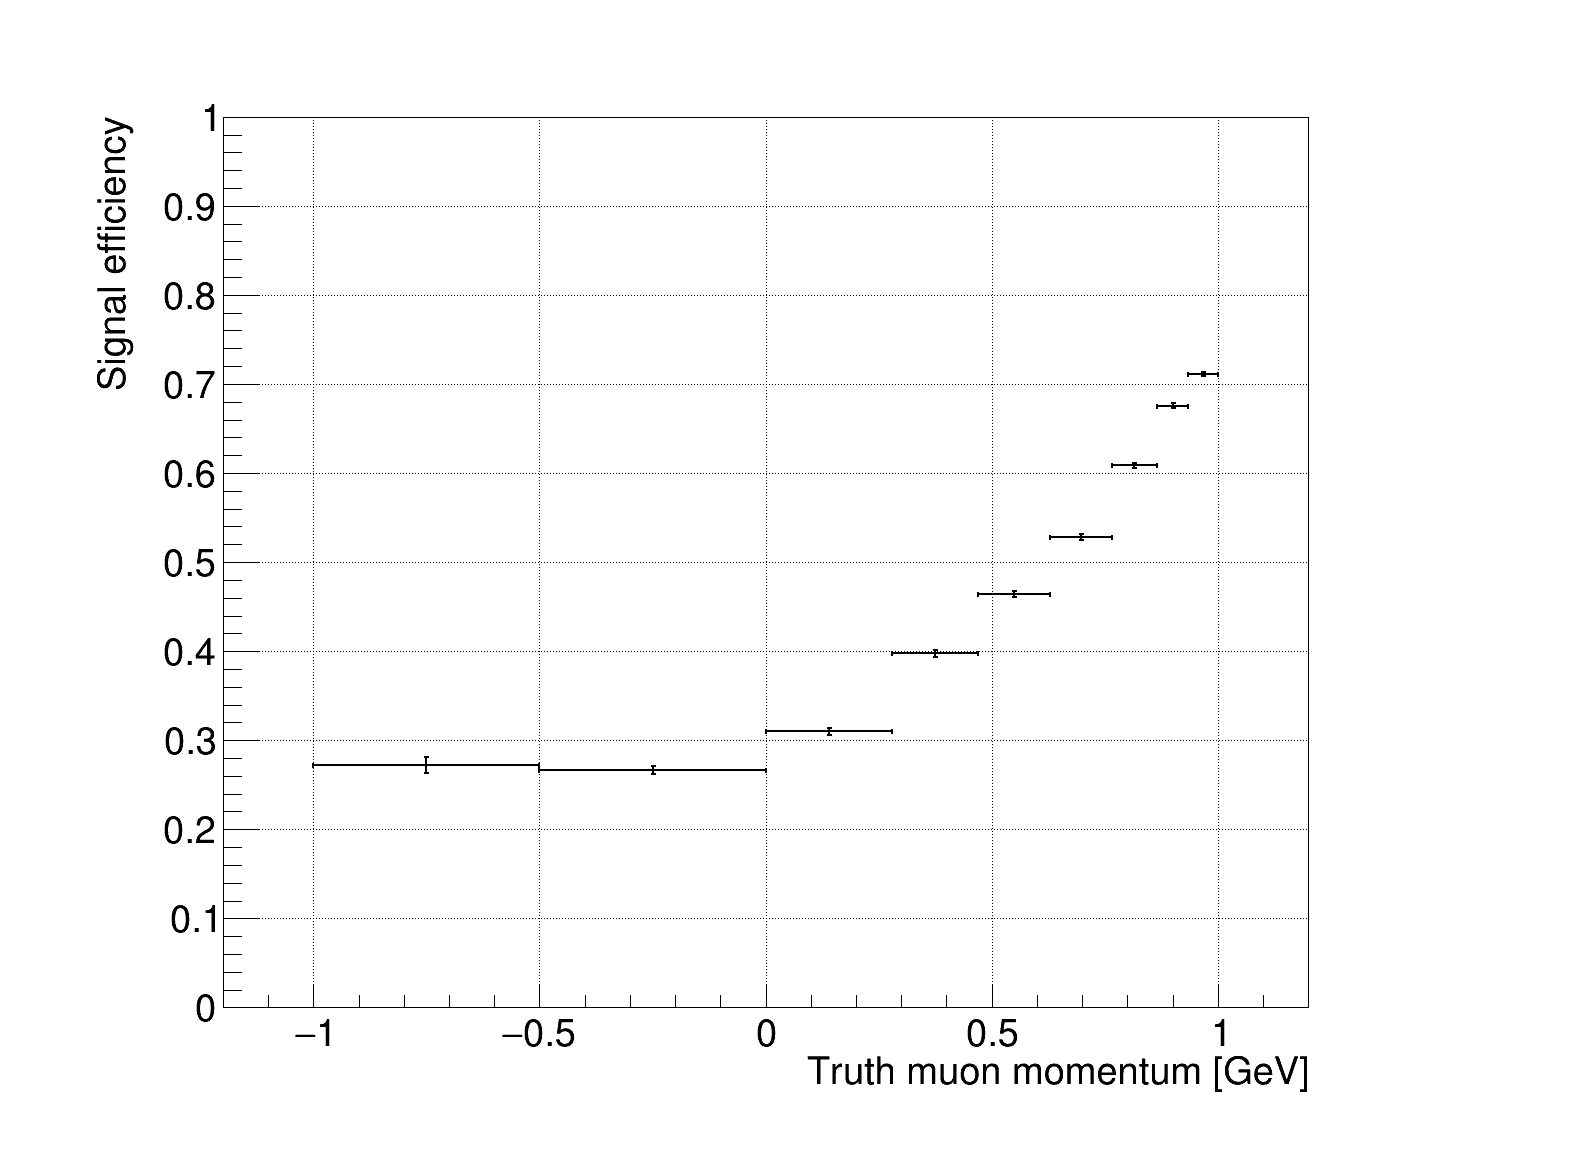

In [16]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum theta efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueTheta.root")

Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//root/h2_true_costheta.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//png/h2_true_costheta.png has been created


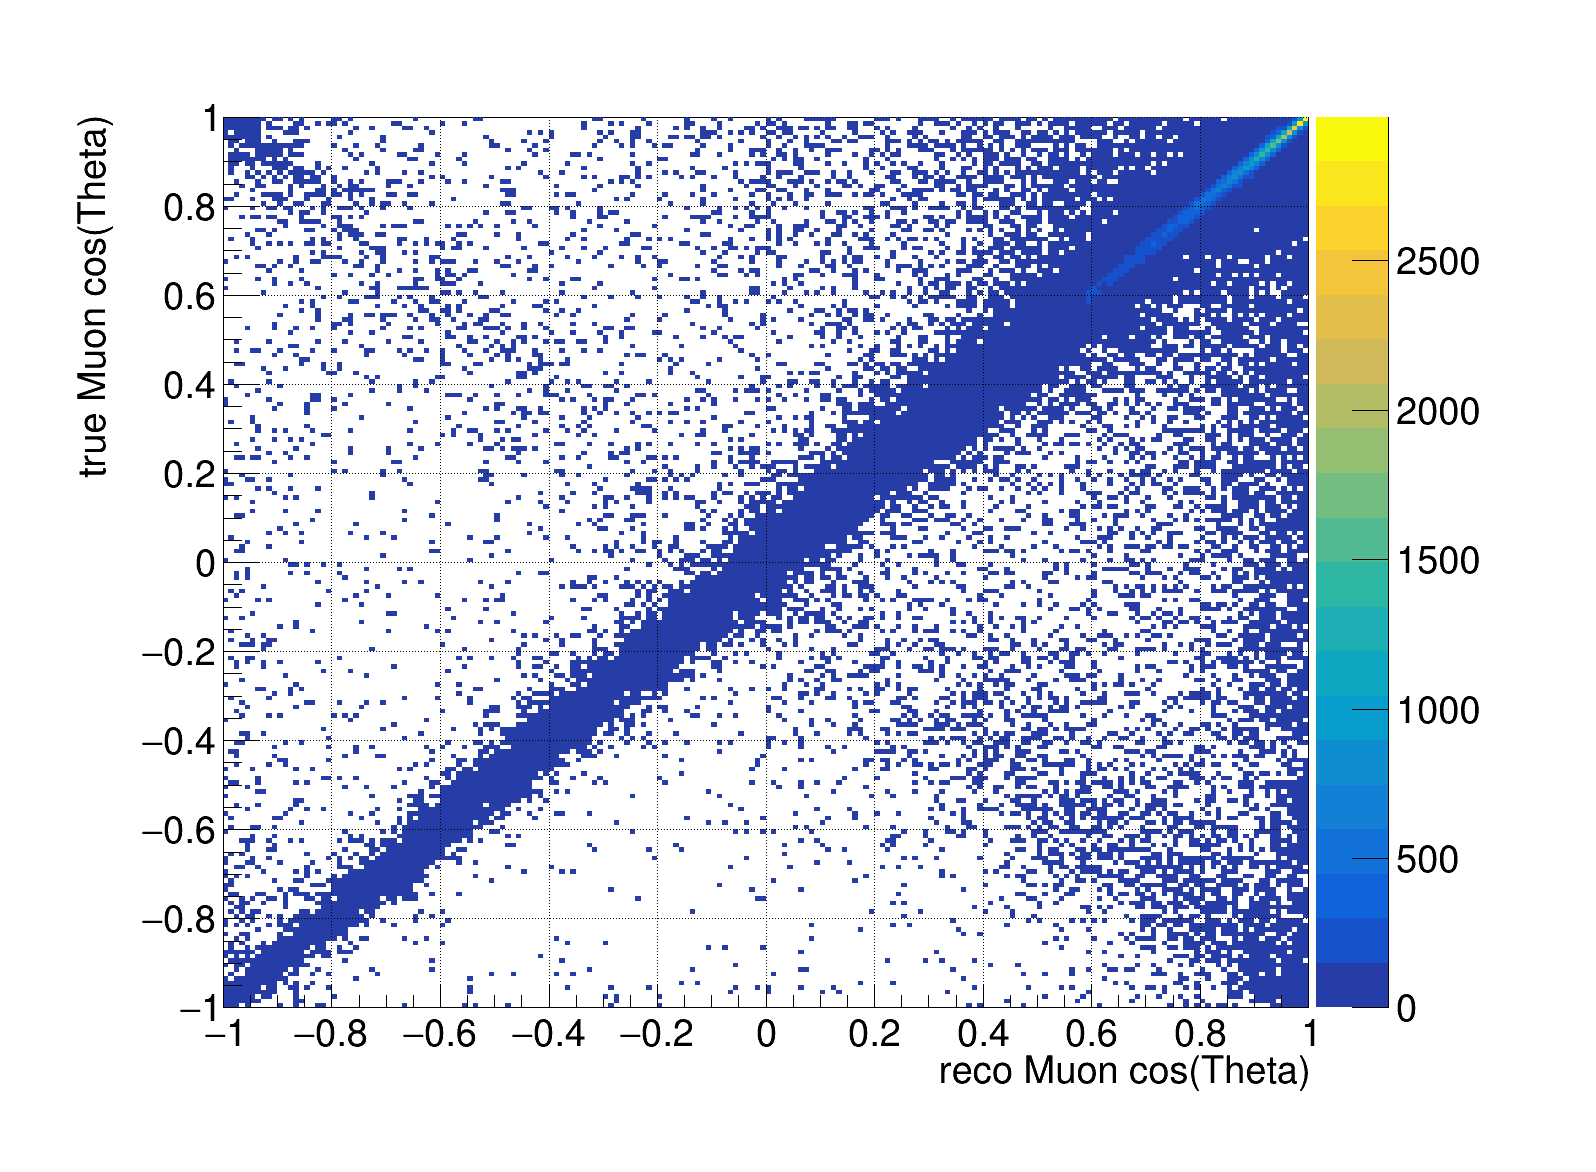

In [17]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,-1,1,200,-1,1)
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon cos(Theta)")
h_migration.SetYTitle("true Muon cos(Theta)")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_costheta.root")
c1.SaveAs(globale.outputdir_png + "h2_true_costheta.png")


Warning in <TROOT::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//root/h2_true_Theta_bin.root has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//png/h2_true_Theta_bin.png has been created


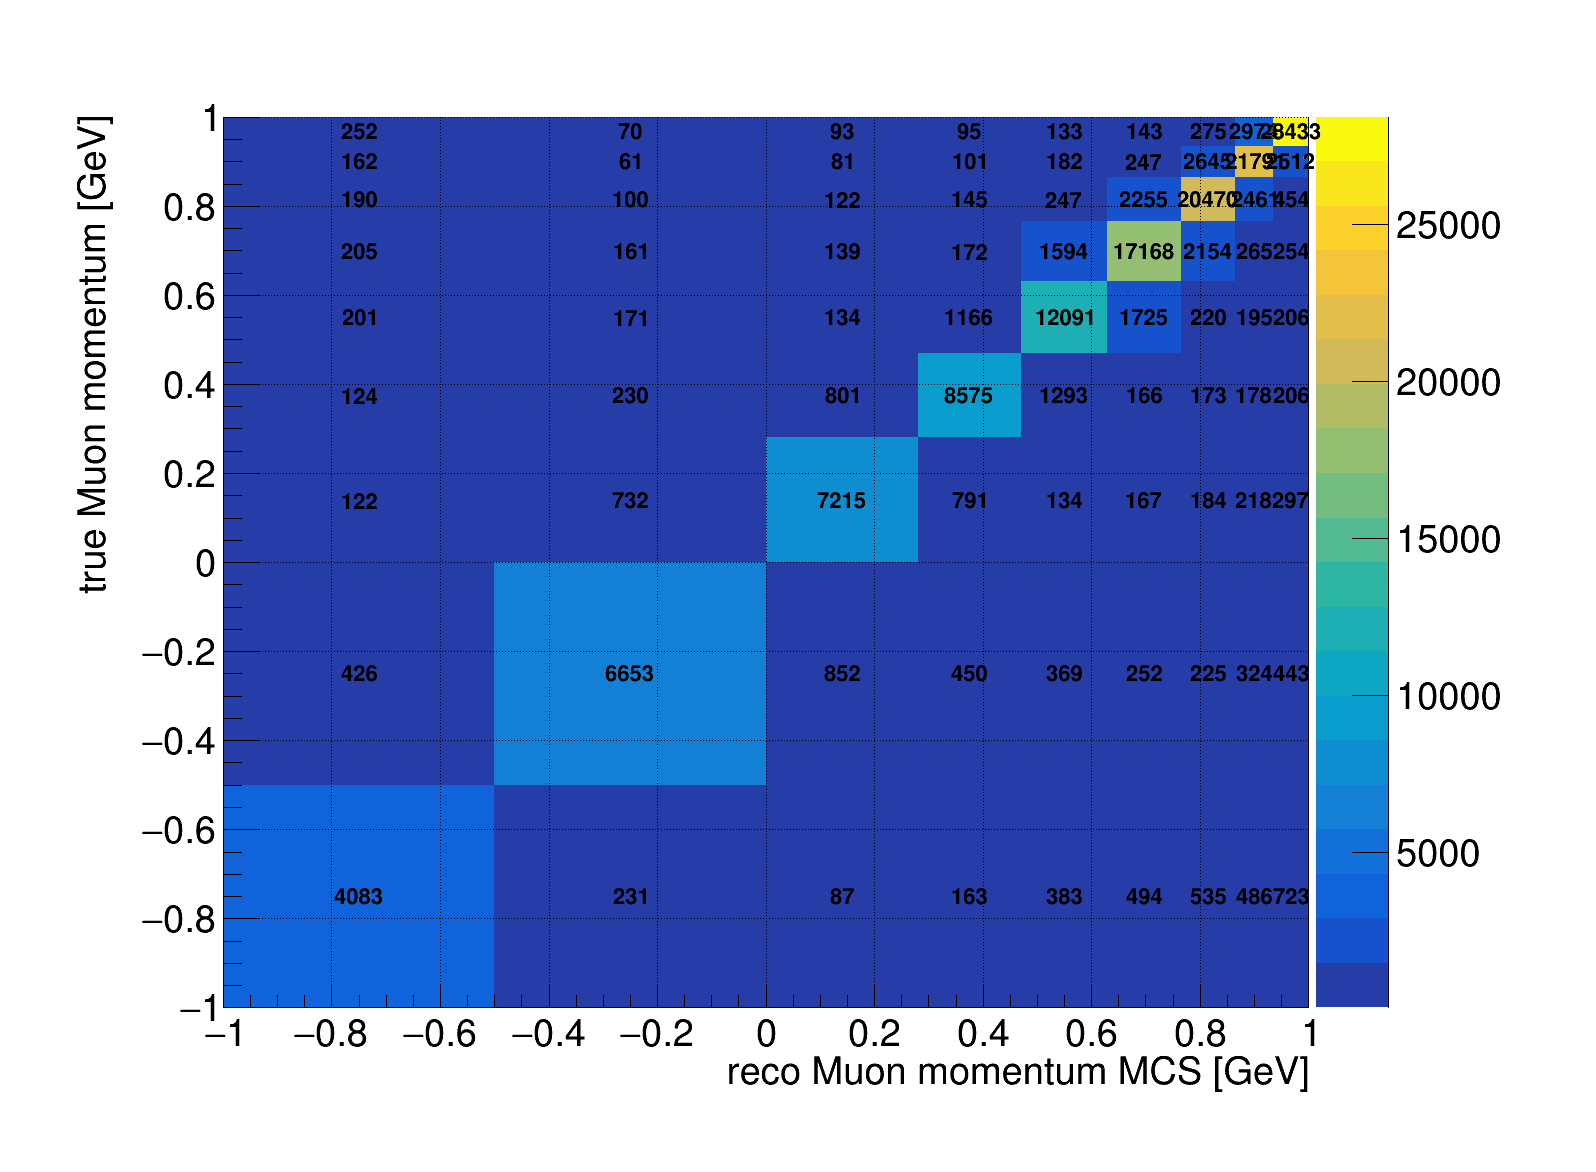

In [18]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
ROOT.gStyle.SetPaintTextFormat("2.0f");
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_Theta_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_Theta_bin.png")


[[0.56823992 0.04259573 0.01241297 0.01054251 0.01246692 0.00928367
  0.00720332 0.00582664 0.00777542]
 [0.03216463 0.6657339  0.07421917 0.01954621 0.01063112 0.00727372
  0.00376584 0.00220131 0.00215305]
 [0.01216463 0.08529867 0.73173248 0.06820962 0.00829029 0.0062766
  0.00462898 0.00290487 0.00285761]
 [0.0227271  0.04499738 0.08021896 0.73000672 0.07236417 0.00779291
  0.00547742 0.00362777 0.00293451]
 [0.05323531 0.03695617 0.01354382 0.11011854 0.75057159 0.0720699
  0.00932466 0.00654647 0.00410962]
 [0.06876832 0.02518998 0.01693683 0.01415668 0.10707248 0.77643672
  0.08527786 0.00887648 0.00441208]
 [0.07442725 0.02246678 0.01863824 0.0147215  0.01367677 0.09740908
  0.77410373 0.09521869 0.00847497]
 [0.0676802  0.03245297 0.02213895 0.01519477 0.0121163  0.01198826
  0.09304643 0.78439076 0.09159316]
 [0.10059265 0.04430841 0.03015857 0.01750344 0.01281036 0.01146914
  0.01717176 0.09040701 0.87568958]]


Warning in <TROOT::Append>: Replacing existing TH1: h_migration (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//png/h_mitigation_matrix_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//root/h_mitigation_matrix_theta.root has been created


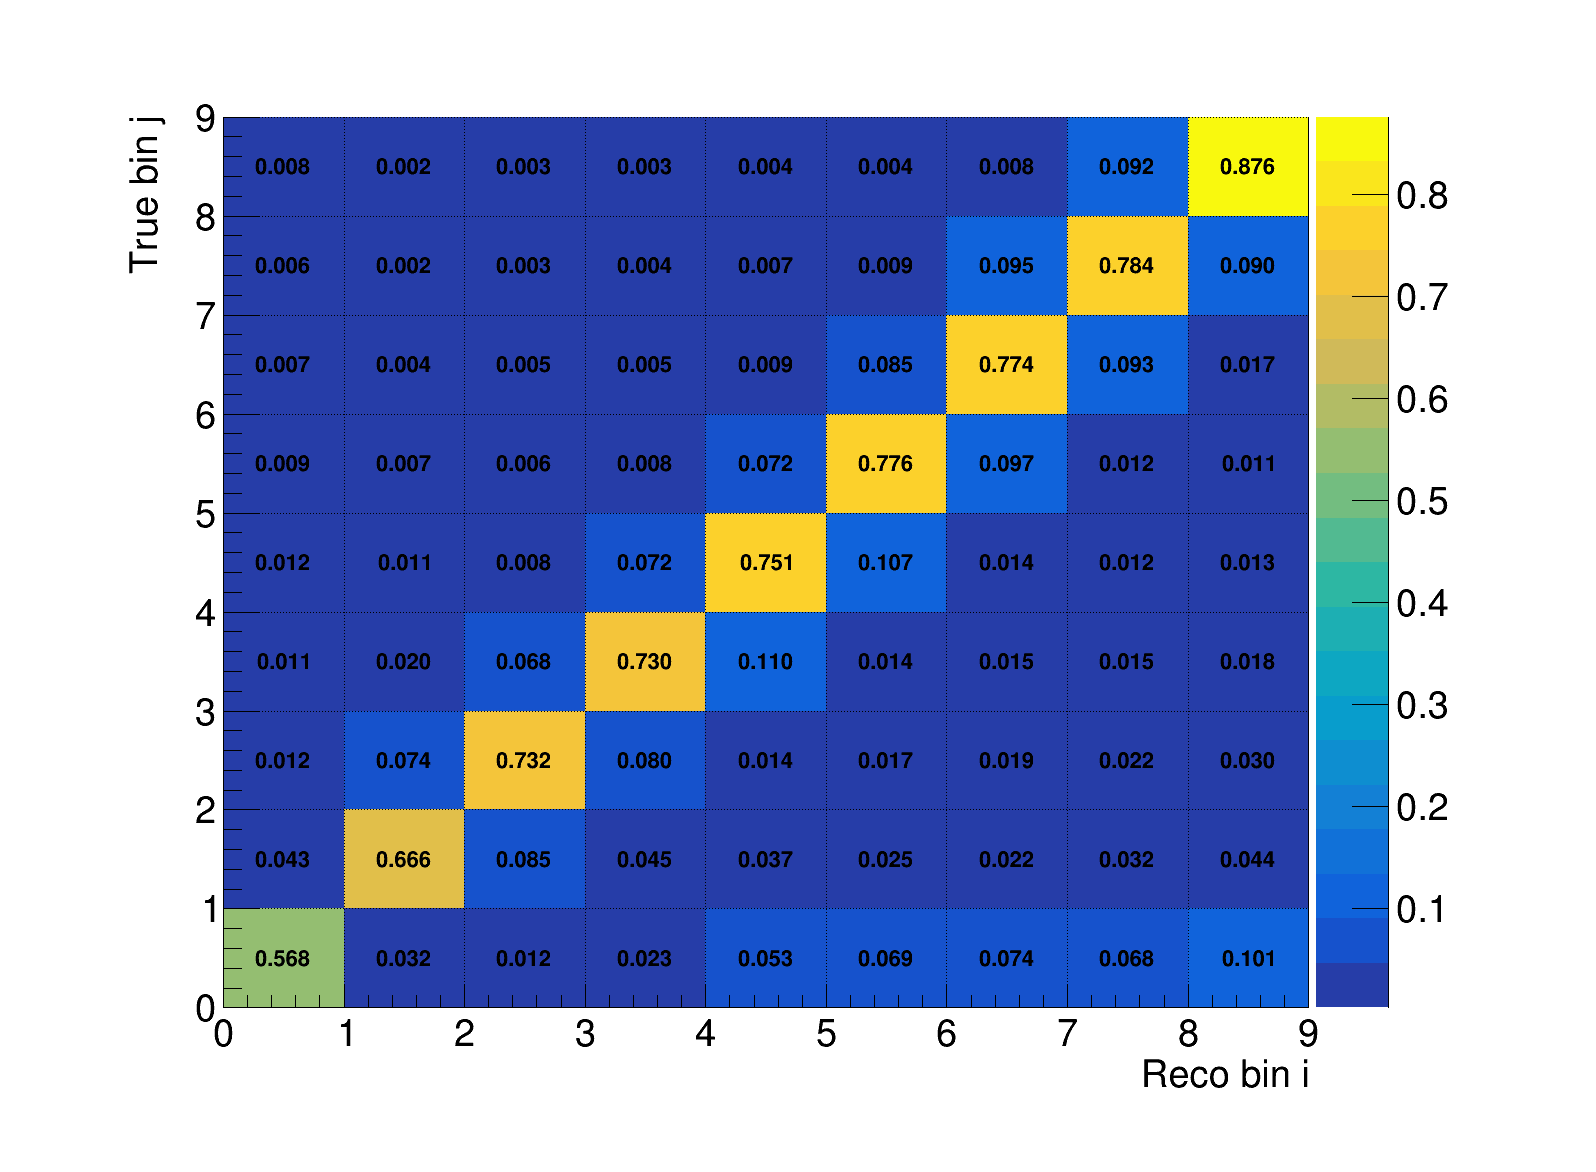

In [19]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ROOT.gStyle.SetPaintTextFormat("2.3f");
mitigation_matrix = np.zeros((9,9))
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',9,0,9,9,0,9)
for j in range(1,binnum+1):
    for i in range(1,binnum+1):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
h_mitigation_matrix.SetXTitle("Reco bin i")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix_theta.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix_theta.root")

In [20]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
globale.overlay_out.Draw('cos(MCNu_leptonTheta)>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

246811L

Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_init_eff_energy_1 (Potential memory leak).


In [21]:
# e tilde
N_sel = np.zeros((9))
N_gen = np.zeros((9))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
print eff_tilde
np.save(outputdir+'eff_tilde_theta_xsec_CV',eff_tilde)

5196.94775390625 19074.498046875 0.2724552824999593
7829.55224609375 29390.185546875 0.26640023192797607
8446.154296875 27229.732421875 0.310181318200901
10574.8681640625 26611.083984375 0.3973858475765833
14965.3017578125 32272.48046875 0.46371712184638736
20921.56640625 39642.0078125 0.5277625317366738
25478.265625 41870.671875 0.6084990874056759
27034.498046875 40015.93359375 0.675593335428202
31868.181640625 44813.57421875 0.7111278713245629
[0.31139813 0.28481318 0.32145127 0.39389296 0.45414381 0.51510482
 0.58529937 0.6408369  0.66446843]


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//png/h_eff_tilde_xsecTheta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//root/h_eff_tilde_xsecTheta.root has been created


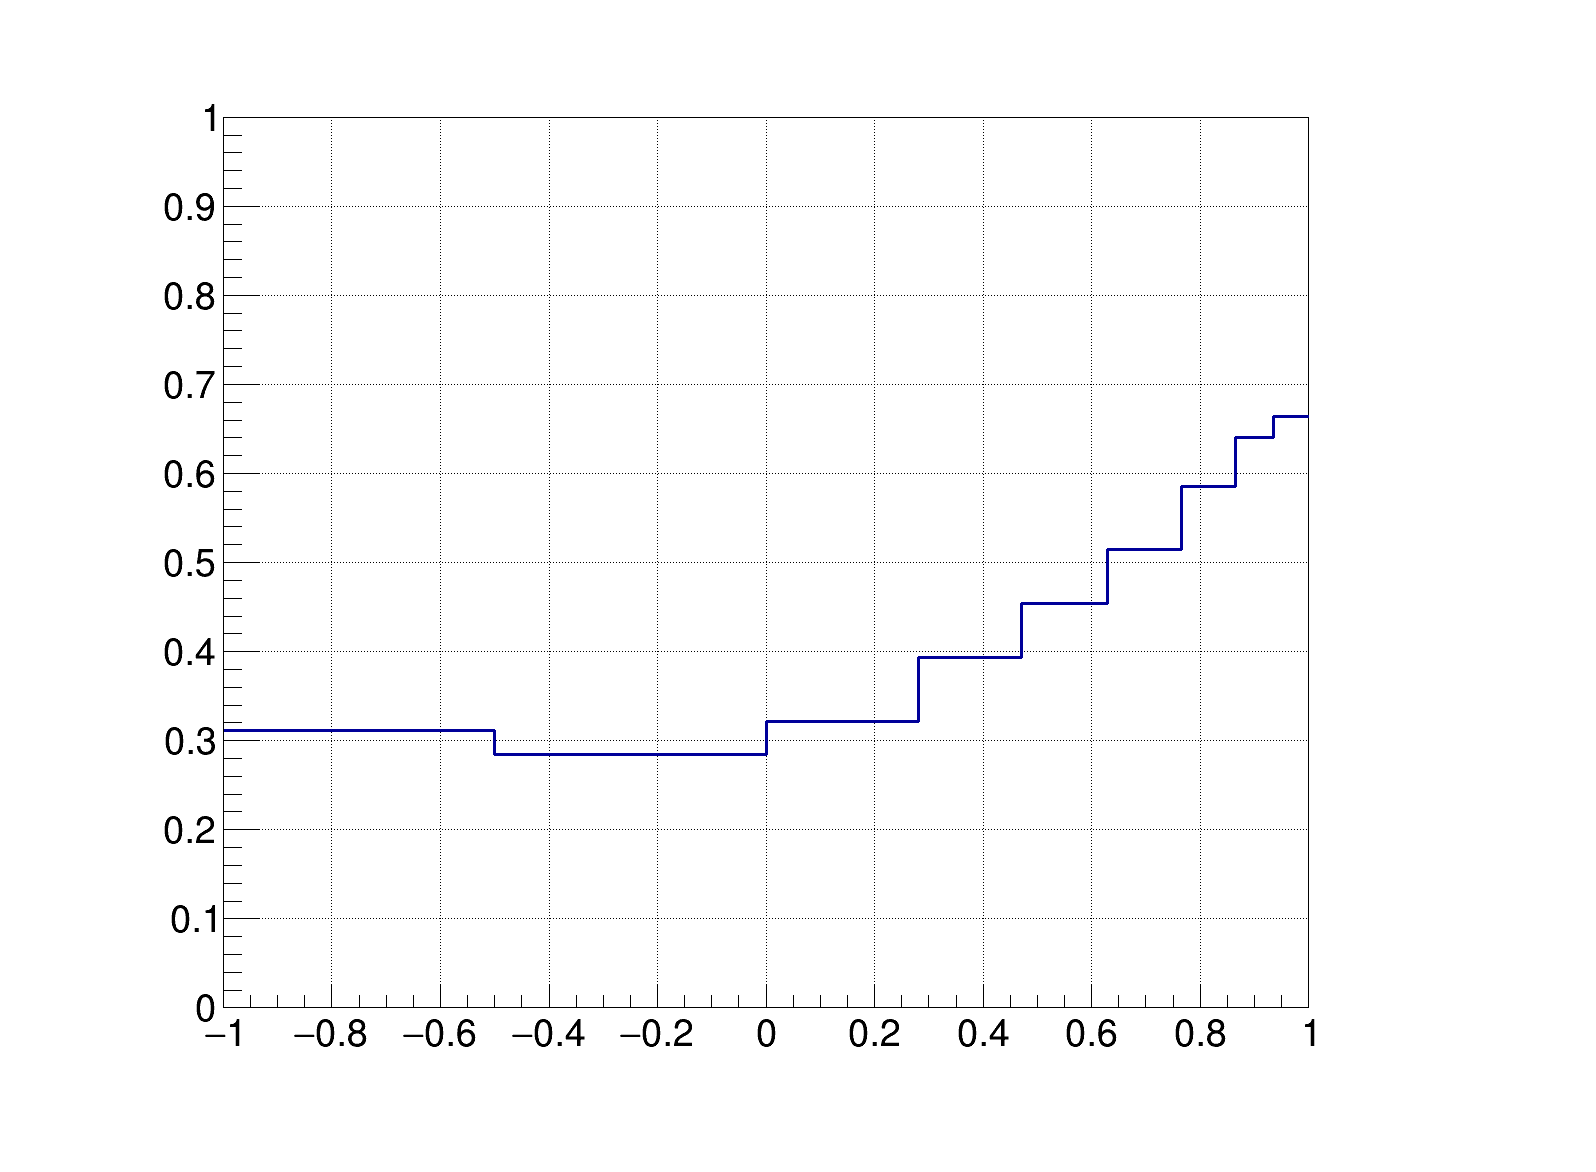

In [22]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,0)
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.Draw('E1')
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecTheta.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecTheta.root")

In [23]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'cos(TrackTheta)'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
globale.ext_out.Draw(variable+'>>h_ext',cut,'')
globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
globale.overlay_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')

28748L

In [24]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
h_ext.Scale(globale.scale[globale.ext])
h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(globale.scale[globale.overlay])

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


In [25]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

223.427711487
1028.18715286


In [26]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [27]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
globale.overlay_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//png/h_xsec_uncorr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//root/h_xsec_uncorr_theta.root has been created


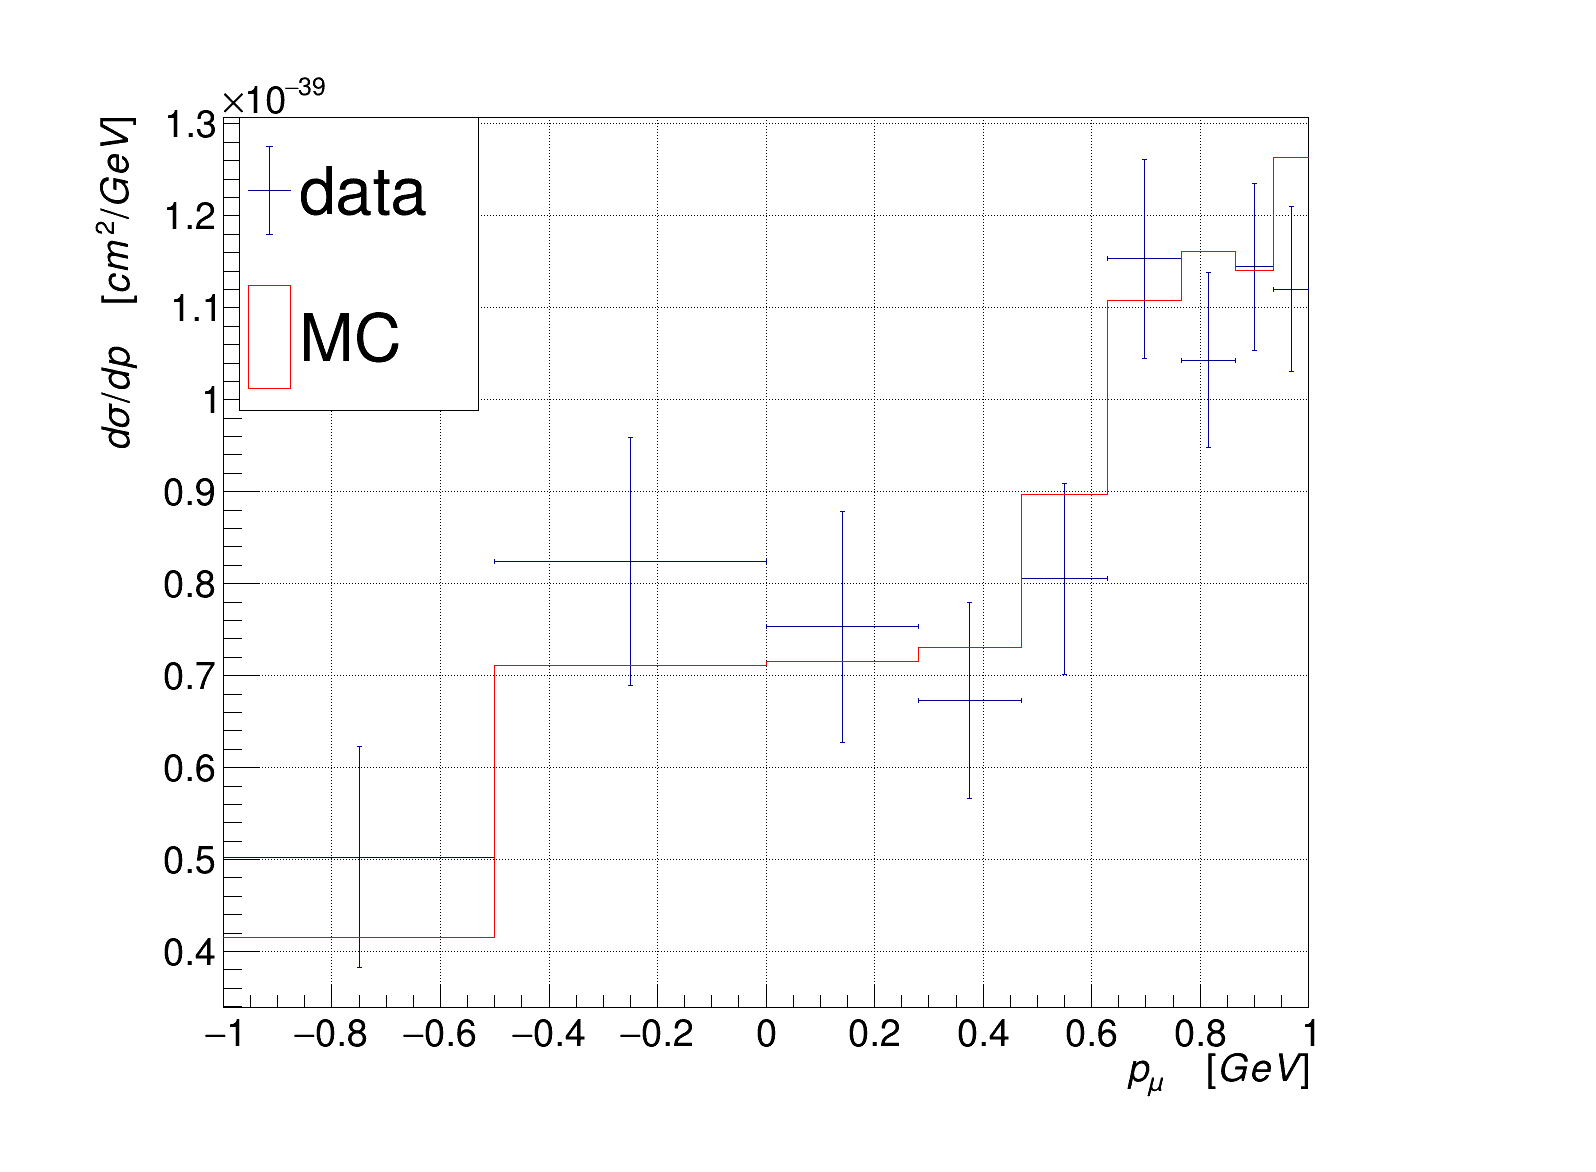

In [28]:
legend = ROOT.TLegend(0.15,0.65,0.3,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.Draw('E1')
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_uncorr_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_uncorr_theta.root")

In [29]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//png/h_xsec_corr_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//root/h_xsec_corr_theta.root has been created


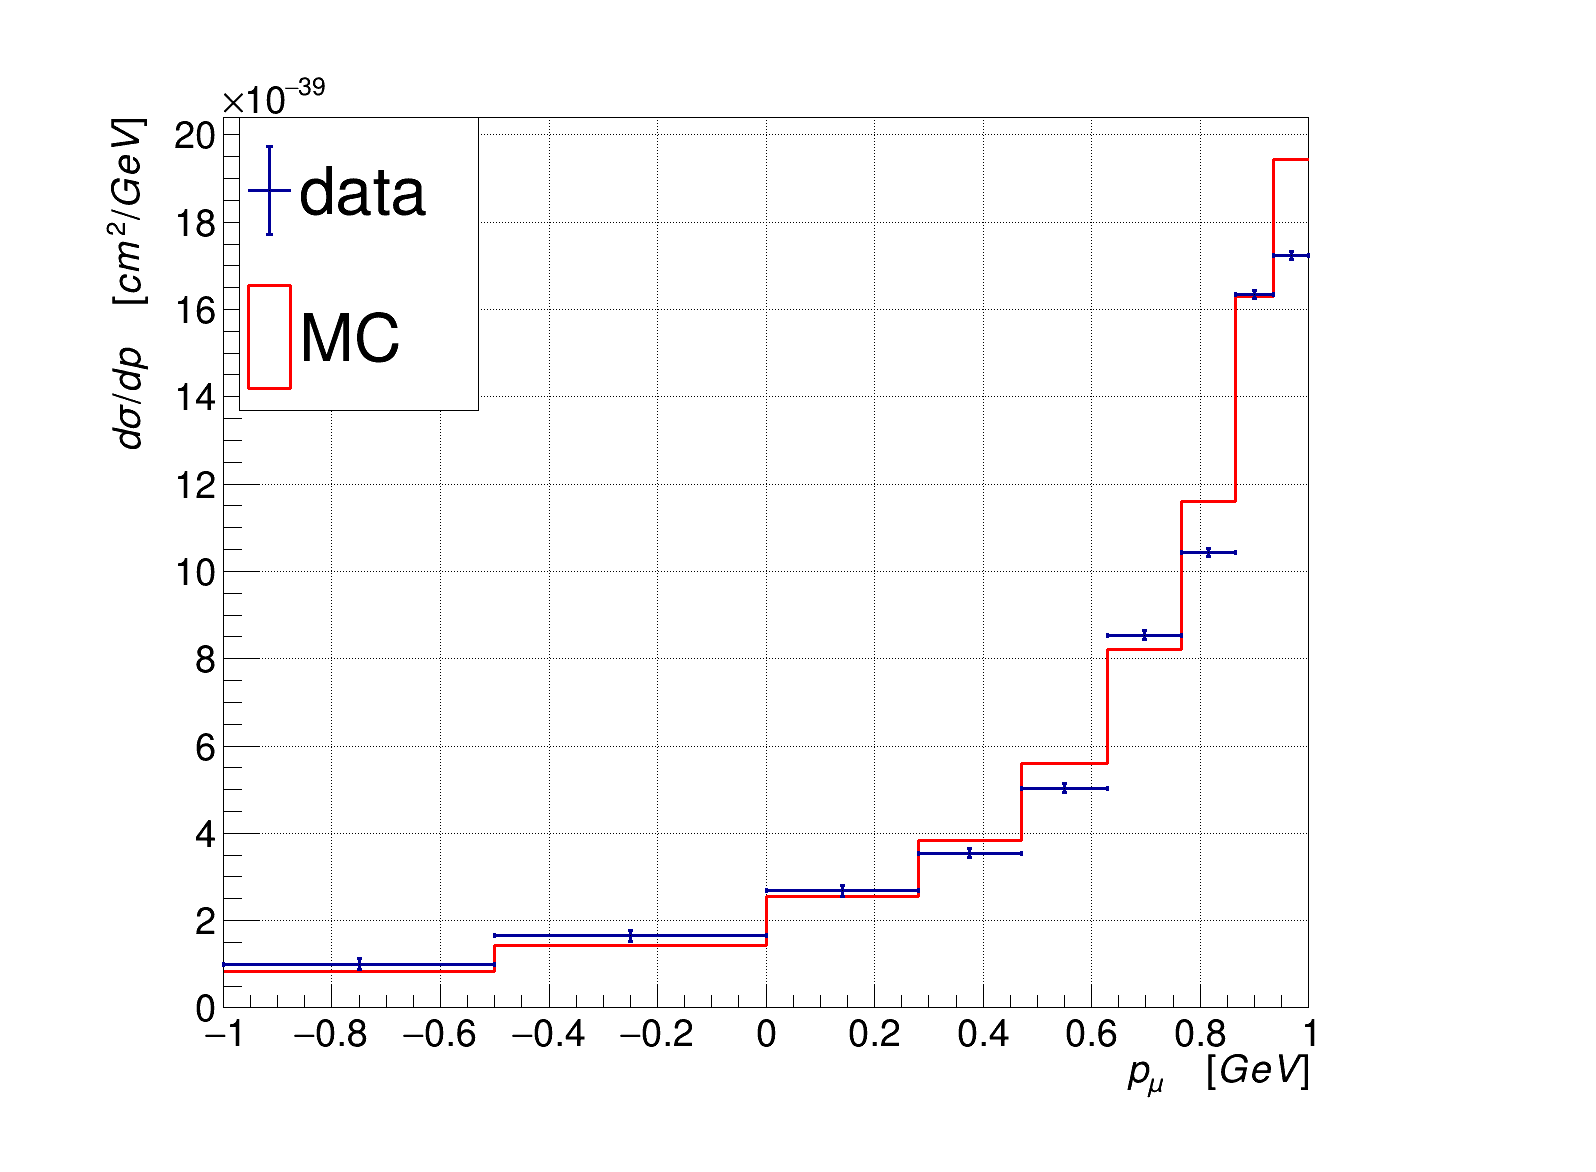

In [30]:
legend = ROOT.TLegend(0.15,0.65,0.3,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_overlay_sig.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_overlay_sig.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist')
h_data.Draw('E1 same')
legend.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_theta.root")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//png/h_xsec_corr_genieall_theta.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted_theta//root/h_xsec_corr_genieall_theta.root has been created


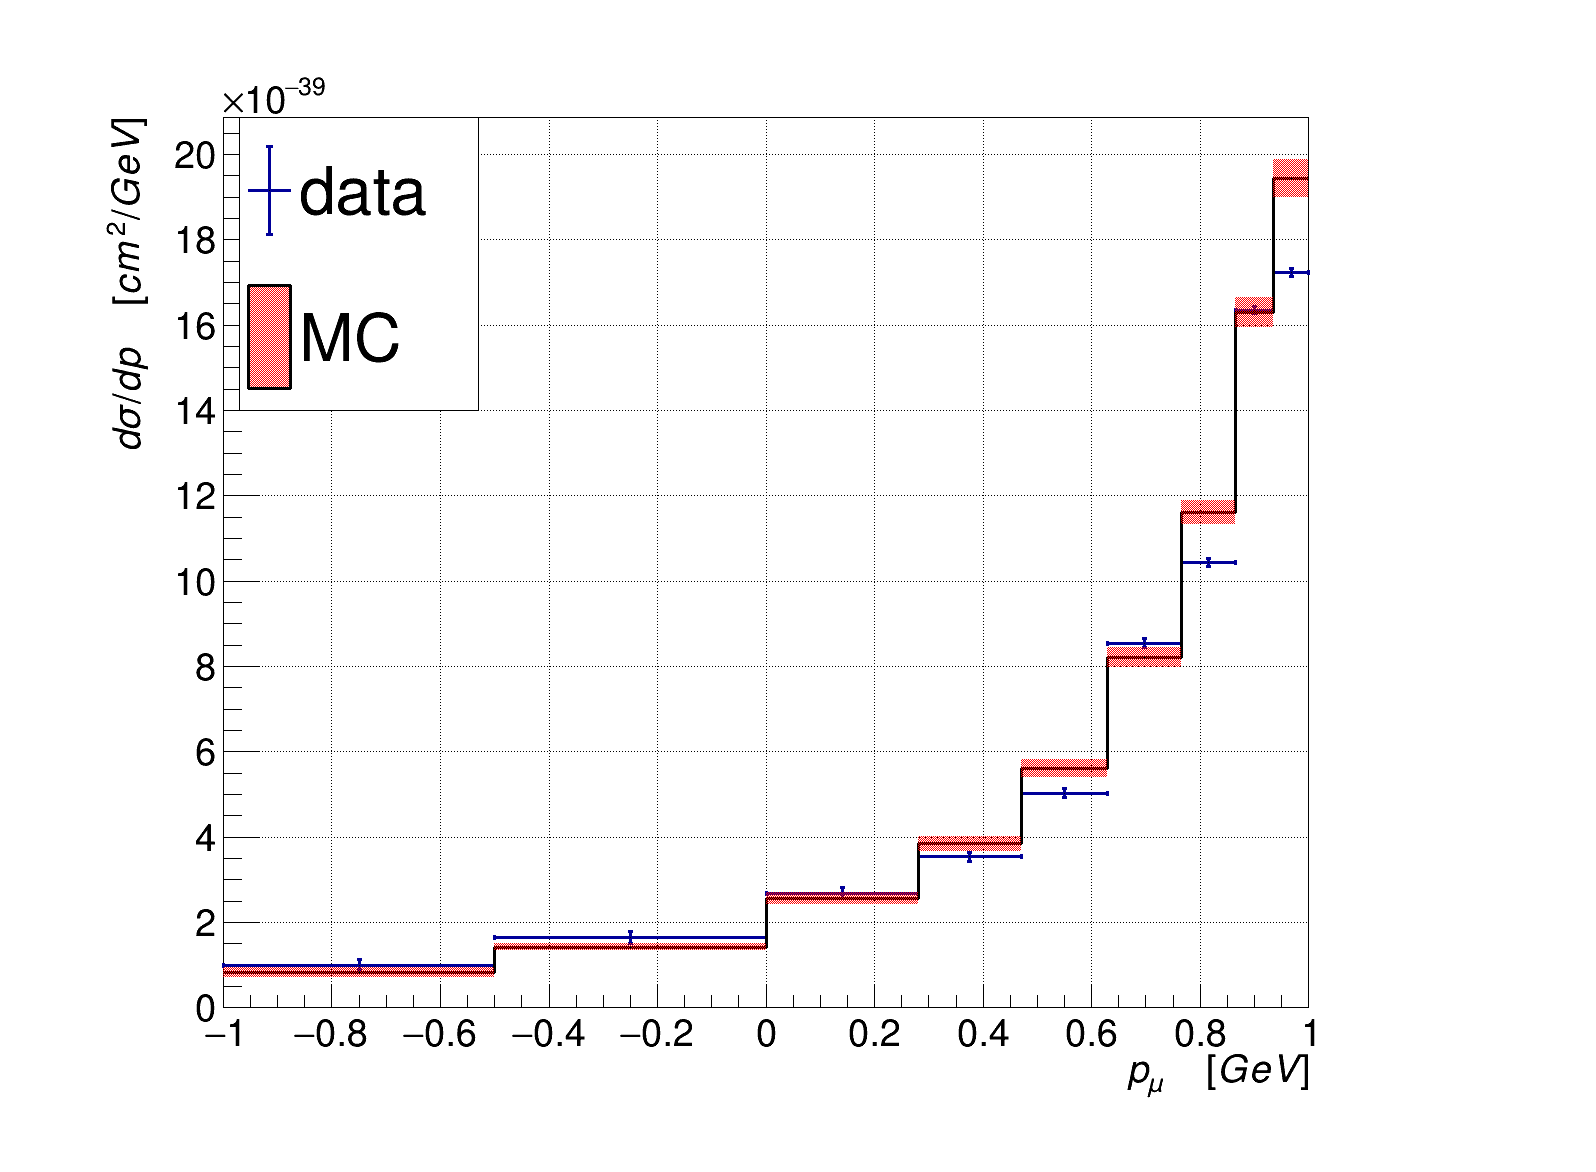

In [33]:
#include error from genie variation:
xsec_std_bin = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted/xsec_genie_all_change_theta.npy')
for i in range(1,binnum+1):
    h_overlay_sig.SetBinError(i,xsec_std_bin[i-1])
    
legend = ROOT.TLegend(0.15,0.65,0.3,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_overlay_sig.Draw('E2')
h_data.Draw('E1 same')
h_overlay_sig.SetLineColor(1)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.SetFillColor(0)
h_overlay_sig.DrawCopy('Hist same')
h_overlay_sig.SetFillColor(2)
h_overlay_sig.SetFillStyle(3001)
h_overlay_sig.Draw('E2 same')
legend.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr_genieall_theta.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr_genieall_theta.root")

Warning in <TROOT::Append>: Replacing existing TH1: h_dirt (Potential memory leak).


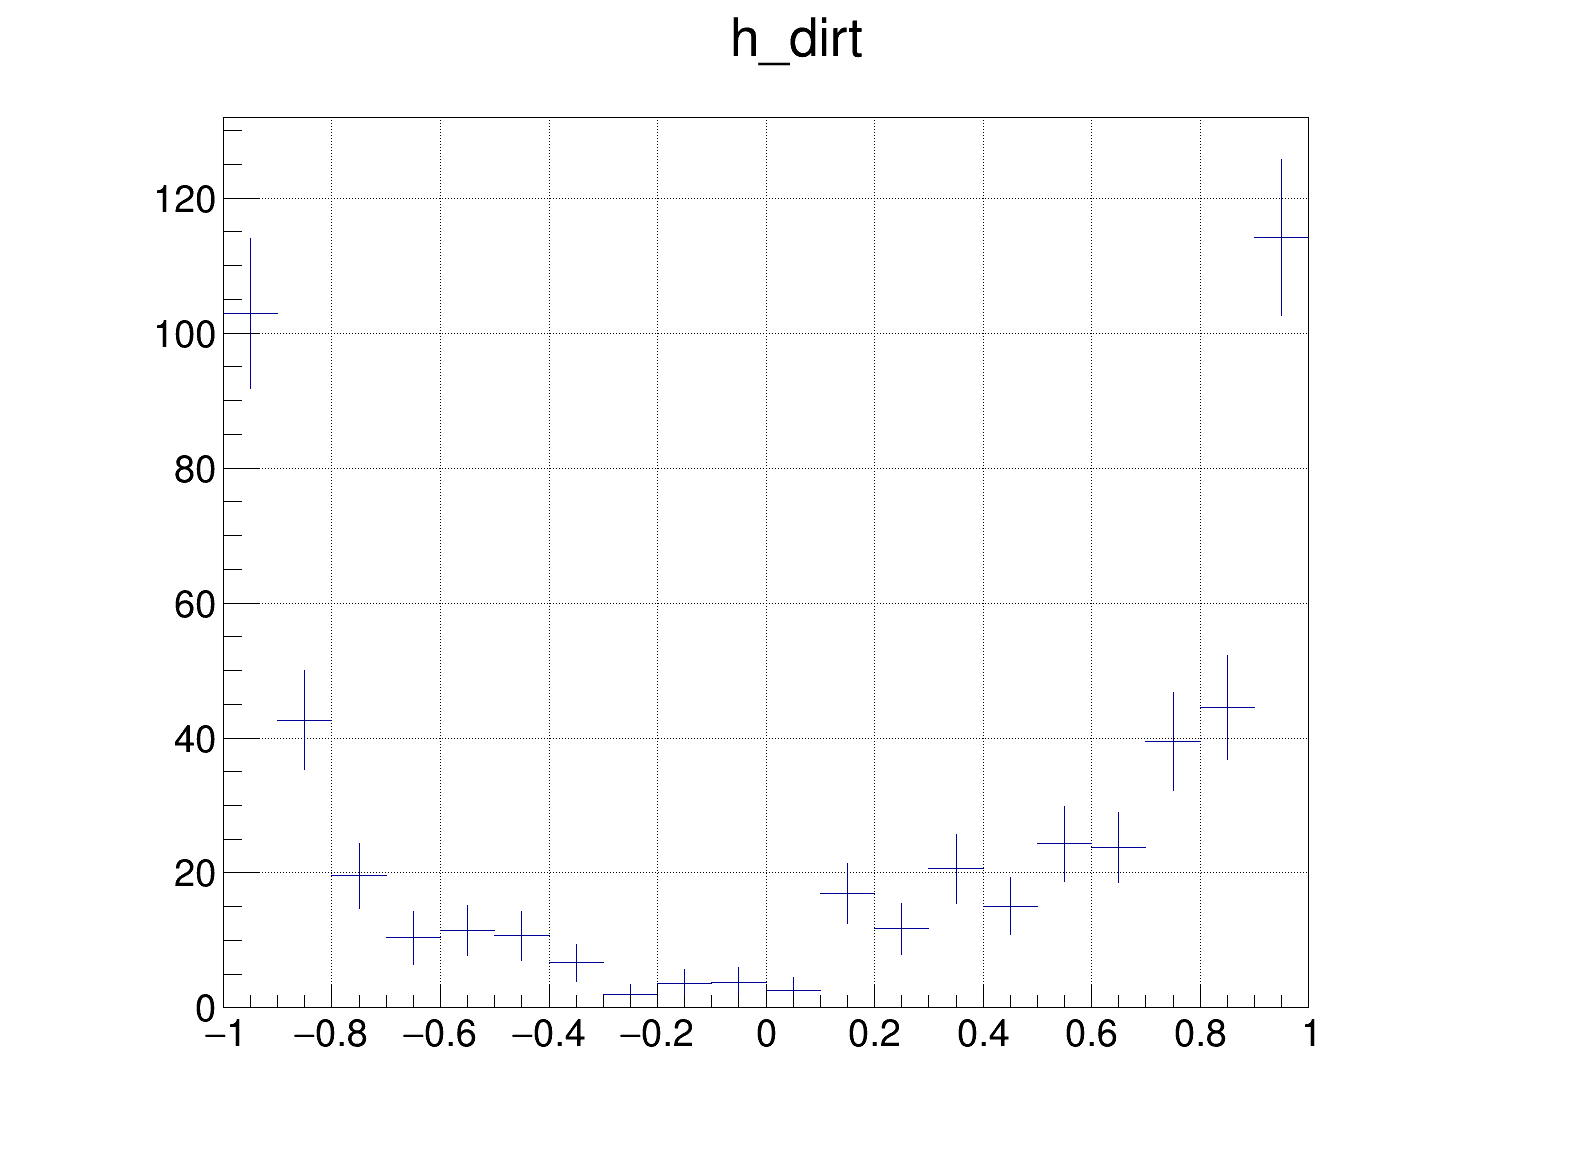

In [15]:
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',20,-1,1)
globale.dirt_out.Draw('cos(TrackTheta)'+'>>h_dirt',weight_name+'*('+cut+')','')
h_dirt.Draw()
c1.Draw()

Normalization (data)/(mc +ext) =  1.05822931456
10.0940039158
Normalization (data)/(mc +ext) =  1.05834884769
21.3665688038
Normalization (data)/(mc +ext) =  1.1054075984
31.2092118263
Normalization (data)/(mc +ext) =  1.05823005039
39.7828588486
Normalization (data)/(mc +ext) =  1.0582298773
48.5839939117
Normalization (data)/(mc +ext) =  1.05822990739
57.0246818066


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//png/costhetaw_initial.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//root/costhetaw_initial.root has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//png/phi_initial.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//root/phi_initial.root has been created
Warning in <TH1F

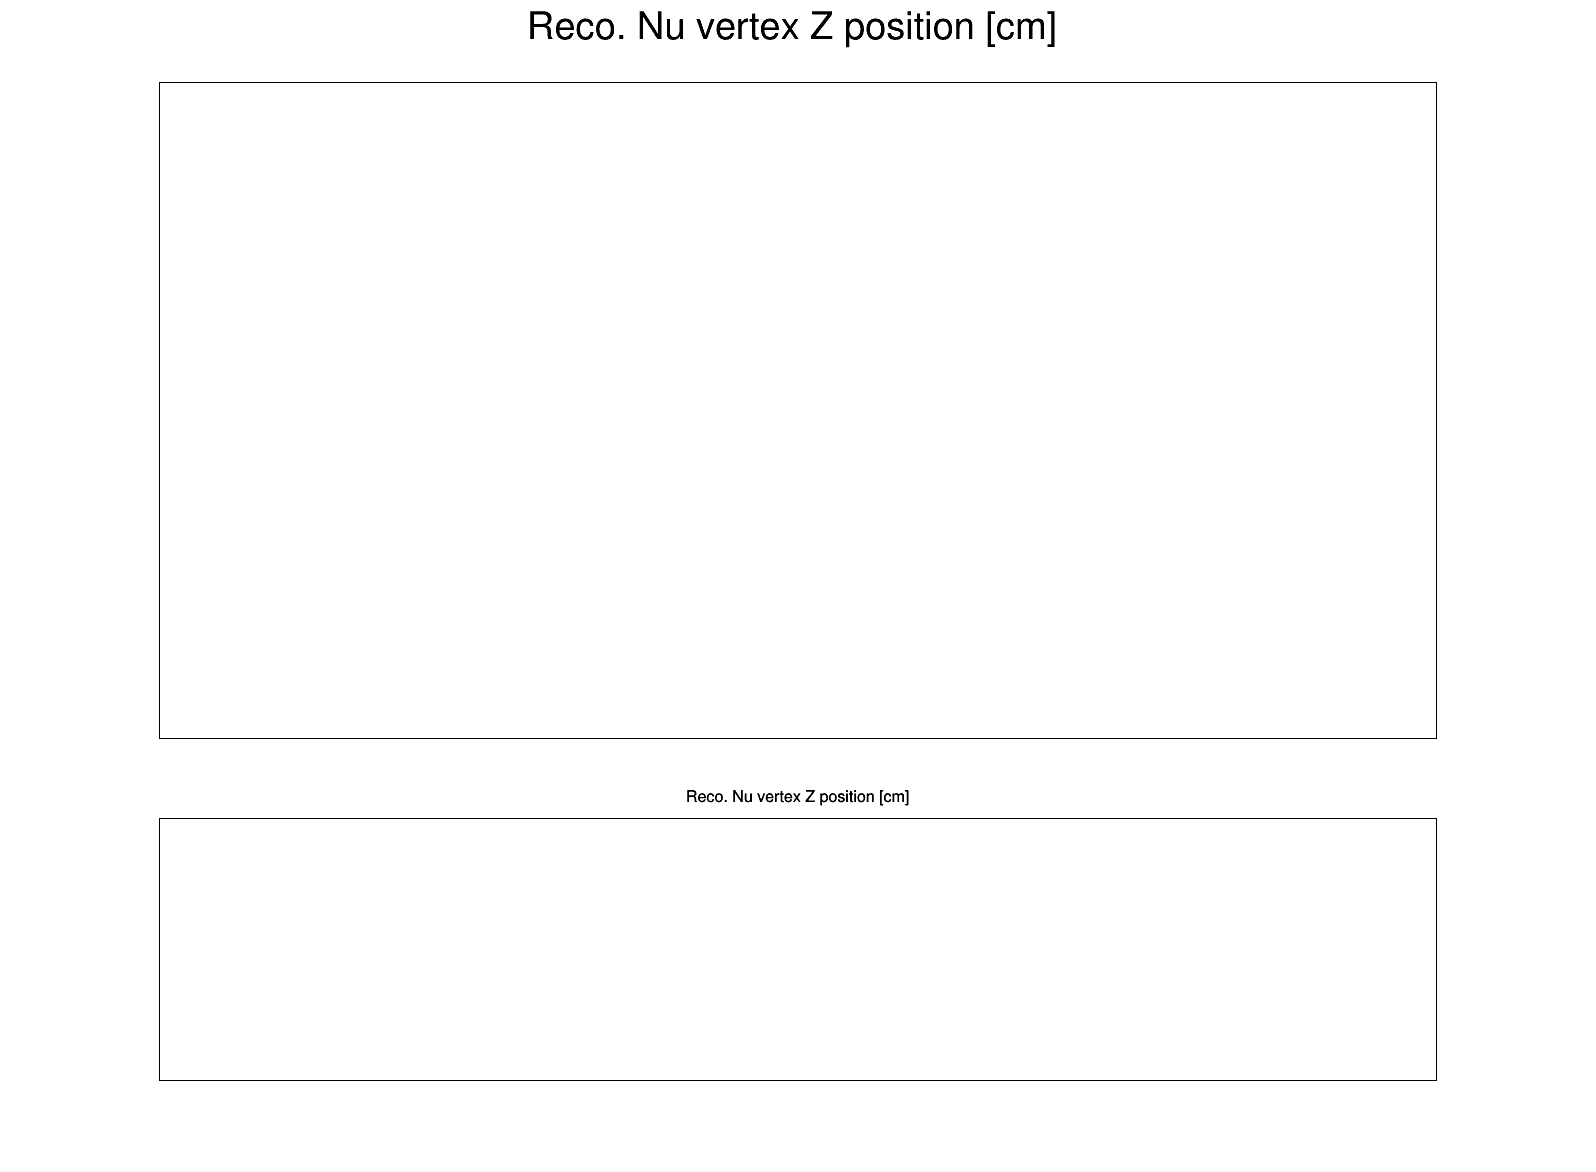

In [14]:
cut = 'fidVol && muon'
name = '_initial'
start = time.time()
NuCC_w.make_stacked_histo_weightV2(cut + ' && TrackTheta!=-9','cos(TrackTheta)','EventWeight','cos(theta)',-1,1,20,'costhetaw'+name,'left')
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && TrackTheta!=-9','TrackPhi','EventWeight','Track Phi',-3.141,3.141,20,'phi'+name,'left')
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','TrackMomMCS_mom','EventWeight','TrackMomMCS_mom',0,1.5,20,'TrackMomMCS_mom'+name)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name)
end = time.time()
print(end - start)

In [ ]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_muon_cut'
start = time.time()
NuCC_w.make_stacked_histo_weightV2(cut + ' && TrackTheta!=-9','cos(TrackTheta)','EventWeight','cos(theta)',-1,1,20,'costhetaw'+name,'left')
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && TrackTheta!=-9','TrackPhi','EventWeight','Track Phi',-3.141,3.141,20,'phi'+name,'left')
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','TrackMomMCS_mom','EventWeight','TrackMomMCS_mom',0,1.5,20,'TrackMomMCS_mom'+name)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,20,'NuVx_sce'+name)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,20,'NuVy_sce'+name)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,20,'NuVz_sce'+name)
end = time.time()
print(end - start)

In [24]:
NuCC_w.printEff_w('fidVol && muon')

Efficiency for cut:  fidVol && muon
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	100.00%	 reject:	0.00%
Keep of    dirt:	100.00%	 reject:	-0.00%
Keep of overlay:	100.00%	 reject:	0.00%

Efficiency:		66.60%
Purity:			35.91%
Purity*Efficiency	23.92

Amount of     ext:	36.28%
Amount of    dirt:	5.03%
Amount of overlay:	58.70%

Signal definition=  numu_lowpur: 3.64%
Signal definition=   numu_other: 0.56%
Signal definition=    numu_nomu: 2.71%
Signal definition=      numu_ov: 9.37%
Signal definition=  numu_signal: 35.91%
Signal definition=      numu_nc: 6.51%


(66.60419570575043, 35.90981382957462)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [30]:
NuCC_w.printEff_w('fidVol && muon && nr_crthit_top==0')

Efficiency for cut:  fidVol && muon && nr_crthit_top==0
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	71.47%	 reject:	28.53%
Keep of    dirt:	96.07%	 reject:	3.93%
Keep of overlay:	97.43%	 reject:	2.57%

Efficiency:		65.00%
Purity:			39.85%
Purity*Efficiency	25.90

Amount of     ext:	29.48%
Amount of    dirt:	5.50%
Amount of overlay:	65.02%

Signal definition=  numu_lowpur: 3.99%
Signal definition=   numu_other: 0.62%
Signal definition=    numu_nomu: 2.97%
Signal definition=      numu_ov: 10.31%
Signal definition=  numu_signal: 39.85%
Signal definition=      numu_nc: 7.28%


(65.00492503318921, 39.849380820073286)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [31]:
NuCC_w.printEff_w('fidVol && muon && nr_crthit_top==0 && crthit_vertex_zcut==0')

Efficiency for cut:  fidVol && muon && nr_crthit_top==0 && crthit_vertex_zcut==0
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	62.50%	 reject:	37.50%
Keep of    dirt:	75.63%	 reject:	24.37%
Keep of overlay:	95.83%	 reject:	4.17%

Efficiency:		64.46%
Purity:			42.03%
Purity*Efficiency	27.09

Amount of     ext:	27.42%
Amount of    dirt:	4.60%
Amount of overlay:	68.02%

Signal definition=  numu_lowpur: 4.18%
Signal definition=   numu_other: 0.66%
Signal definition=    numu_nomu: 3.08%
Signal definition=      numu_ov: 10.38%
Signal definition=  numu_signal: 42.03%
Signal definition=      numu_nc: 7.69%


(64.46219823950443, 42.02637240582913)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [32]:
NuCC_w.printEff_w('fidVol && muon && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0)')

Efficiency for cut:  fidVol && muon && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0)
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	56.59%	 reject:	43.41%
Keep of    dirt:	72.48%	 reject:	27.52%
Keep of overlay:	90.93%	 reject:	9.07%

Efficiency:		61.53%
Purity:			42.80%
Purity*Efficiency	26.34

Amount of     ext:	26.48%
Amount of    dirt:	4.71%
Amount of overlay:	68.85%

Signal definition=  numu_lowpur: 4.20%
Signal definition=   numu_other: 0.68%
Signal definition=    numu_nomu: 2.97%
Signal definition=      numu_ov: 10.10%
Signal definition=  numu_signal: 42.80%
Signal definition=      numu_nc: 8.11%


(61.53357086595449, 42.79784815663034)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [33]:
NuCC_w.printEff_w('fidVol && muon && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut')

Efficiency for cut:  fidVol && muon && nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	42.37%	 reject:	57.63%
Keep of    dirt:	60.31%	 reject:	39.69%
Keep of overlay:	84.46%	 reject:	15.54%

Efficiency:		59.23%
Purity:			47.00%
Purity*Efficiency	27.84

Amount of     ext:	22.62%
Amount of    dirt:	4.47%
Amount of overlay:	72.96%

Signal definition=  numu_lowpur: 3.71%
Signal definition=   numu_other: 0.74%
Signal definition=    numu_nomu: 3.29%
Signal definition=      numu_ov: 9.63%
Signal definition=  numu_signal: 47.00%
Signal definition=      numu_nc: 8.59%


(59.23340749090525, 46.99958296924639)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [31]:
NuCC_w.printEff_w('fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1')

Efficiency for cut:  fidVol && muon && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	11.24%	 reject:	88.76%
Keep of    dirt:	18.73%	 reject:	81.27%
Keep of overlay:	56.53%	 reject:	43.47%

Efficiency:		50.85%
Purity:			71.77%
Purity*Efficiency	36.49

Amount of     ext:	10.67%
Amount of    dirt:	2.47%
Amount of overlay:	86.87%

Signal definition=  numu_lowpur: 2.67%
Signal definition=   numu_other: 0.77%
Signal definition=    numu_nomu: 2.69%
Signal definition=      numu_ov: 5.60%
Signal definition=  numu_signal: 71.77%
Signal definition=      numu_nc: 3.36%


(50.84615337665601, 71.76909322796398)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [25]:
NuCC_w.printEff_w('fidVol && muon && crt_tom_cut')

Efficiency for cut:  fidVol && muon && crt_tom_cut
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	42.37%	 reject:	57.63%
Keep of    dirt:	60.31%	 reject:	39.69%
Keep of overlay:	84.46%	 reject:	15.54%

Efficiency:		59.23%
Purity:			47.00%
Purity*Efficiency	27.84

Amount of     ext:	22.62%
Amount of    dirt:	4.47%
Amount of overlay:	72.96%

Signal definition=  numu_lowpur: 3.71%
Signal definition=   numu_other: 0.74%
Signal definition=    numu_nomu: 3.29%
Signal definition=      numu_ov: 9.63%
Signal definition=  numu_signal: 47.00%
Signal definition=      numu_nc: 8.59%


(59.23340749090525, 46.99958296924639)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [26]:
NuCC_w.printEff_w('fidVol && muon && crt_tom_cut && TrackScore>0.8')

Efficiency for cut:  fidVol && muon && crt_tom_cut && TrackScore>0.8
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	37.27%	 reject:	62.73%
Keep of    dirt:	48.85%	 reject:	51.15%
Keep of overlay:	78.25%	 reject:	21.75%

Efficiency:		57.70%
Purity:			50.28%
Purity*Efficiency	29.01

Amount of     ext:	21.85%
Amount of    dirt:	3.97%
Amount of overlay:	74.24%

Signal definition=  numu_lowpur: 3.39%
Signal definition=   numu_other: 0.72%
Signal definition=    numu_nomu: 3.13%
Signal definition=      numu_ov: 8.92%
Signal definition=  numu_signal: 50.28%
Signal definition=      numu_nc: 7.81%


(57.696391443021675, 50.27762061341999)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [27]:
NuCC_w.printEff_w('fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20')

Efficiency for cut:  fidVol && muon && crt_tom_cut && TrackScore>0.8                && TrackLength>20
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	33.20%	 reject:	66.80%
Keep of    dirt:	40.57%	 reject:	59.43%
Keep of overlay:	71.50%	 reject:	28.50%

Efficiency:		56.53%
Purity:			54.40%
Purity*Efficiency	30.75

Amount of     ext:	21.50%
Amount of    dirt:	3.65%
Amount of overlay:	74.91%

Signal definition=  numu_lowpur: 3.28%
Signal definition=   numu_other: 0.68%
Signal definition=    numu_nomu: 2.77%
Signal definition=      numu_ov: 8.26%
Signal definition=  numu_signal: 54.40%
Signal definition=      numu_nc: 5.52%


(56.530171272980965, 54.40043347343899)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [28]:
NuCC_w.printEff_w('fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78')

Efficiency for cut:  fidVol && muon && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	31.92%	 reject:	68.08%
Keep of    dirt:	38.58%	 reject:	61.42%
Keep of overlay:	67.36%	 reject:	32.64%

Efficiency:		56.36%
Purity:			57.32%
Purity*Efficiency	32.31

Amount of     ext:	21.84%
Amount of    dirt:	3.66%
Amount of overlay:	74.58%

Signal definition=  numu_lowpur: 3.24%
Signal definition=   numu_other: 0.64%
Signal definition=    numu_nomu: 2.03%
Signal definition=      numu_ov: 8.21%
Signal definition=  numu_signal: 57.32%
Signal definition=      numu_nc: 3.14%


(56.36403733594071, 57.31857480680927)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [29]:
NuCC_w.printEff_w('fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1')

Efficiency for cut:  fidVol && muon && crt_tom_cut && TrackScore>0.8                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1
Used weight:  EventWeight*TunedCentralValue_Genie

Keep of     ext:	11.24%	 reject:	88.76%
Keep of    dirt:	18.73%	 reject:	81.27%
Keep of overlay:	56.53%	 reject:	43.47%

Efficiency:		50.85%
Purity:			71.77%
Purity*Efficiency	36.49

Amount of     ext:	10.67%
Amount of    dirt:	2.47%
Amount of overlay:	86.87%

Signal definition=  numu_lowpur: 2.67%
Signal definition=   numu_other: 0.77%
Signal definition=    numu_nomu: 2.69%
Signal definition=      numu_ov: 5.60%
Signal definition=  numu_signal: 71.77%
Signal definition=      numu_nc: 3.36%


(50.84615337665601, 71.76909322796398)

Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).


In [13]:
nenner = 'numu_true'
zahler = 'fidVol && muon && numu_signal'
cut = 'fidVol && muon'
start = time.time()
NuCC_w.plot_eff_w(nenner,zahler,cut,'initial','initial')
end = time.time()
print(end - start)

Efficiency:	66.60%
Purity:		35.91%
20.563336134


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//png/h_eff_energyinitial.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//root/h_eff_energyinitial.root has been created
Info in <TEfficiency::TEfficiency>: given histograms are fill

In [12]:
nenner = 'numu_true'
zahler = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
start = time.time()
NuCC_w.plot_eff_w(nenner,zahler,cut,'allcut','allcut')
end = time.time()
print(end - start)

Efficiency:	50.85%
Purity:		71.77%
53.6672999859


Warning in <TROOT::Append>: Replacing existing TH1: h_weight_func (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//png/h_eff_energyallcut.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//root/h_eff_energyallcut.root has been created
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histog

In [ ]:
nenner = 'numu_signal && fidVol && muon'
zahler = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
start = time.time()
NuCC_w.plot_eff_w(nenner,zahler,cut,'tomcut_only','tomcut_only')
end = time.time()
print(end - start)

In [12]:
nenner = 'numu_signal && fidVol && muon'
zahler = 'fidVol && muon && crt_tom_cut && numu_signal'
cut = 'fidVol && muon && crt_tom_cut'
start = time.time()
NuCC_w.plot_eff_w(nenner,zahler,cut,'crtcut_only','crtcut_only')
end = time.time()
print(end - start)

Efficiency:	59.23%
Purity:		52.85%
42.8047559261


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//png/h_eff_energycrtcut_only.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/muon_cut_weighted//root/h_eff_energycrtcut_only.root has been created
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Histograms are filled with weights
Warning in <TEfficiency::GetEfficiencyErrorLow>: fre

In [27]:
NuCC_w.pdg_content33_w('fidVol && muon')

Total number of entries:  279746.0
PDG:  13 	=	67.6% ,	error: 0.1% ,	number:  220349.46875
PDG:  2212 	=	11.7% ,	error: 0.1% ,	number:  38248.5585938
PDG:  -1 	=	9.4% ,	error: 0.1% ,	number:  30640.5703125
PDG:  11 	=	3.5% ,	error: 0.0% ,	number:  11440.4736328
PDG:  211 	=	3.2% ,	error: 0.0% ,	number:  10281.9970703
PDG:  -211 	=	1.8% ,	error: 0.0% ,	number:  5995.63183594
PDG:  -11 	=	1.1% ,	error: 0.0% ,	number:  3722.6628418
PDG:  2112 	=	1.0% ,	error: 0.0% ,	number:  3204.06079102
PDG:  -13 	=	0.7% ,	error: 0.0% ,	number:  2151.72485352
PDG:  22 	=	0.0% ,	error: 0.0% ,	number:  104.002746582
PDG:  321 	=	0.0% ,	error: 0.0% ,	number:  39.0
PDG:  -321 	=	0.0% ,	error: 0.0% ,	number:  1.0


In [28]:
NuCC_w.pdg_content33_w('fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1')

Total number of entries:  157507.0
PDG:  13 	=	87.3% ,	error: 0.2% ,	number:  160959.3125
PDG:  211 	=	3.4% ,	error: 0.0% ,	number:  6201.94970703
PDG:  2212 	=	2.8% ,	error: 0.0% ,	number:  5217.11328125
PDG:  -1 	=	2.3% ,	error: 0.0% ,	number:  4180.69628906
PDG:  -211 	=	1.8% ,	error: 0.0% ,	number:  3362.97265625
PDG:  11 	=	1.0% ,	error: 0.0% ,	number:  1758.77819824
PDG:  -13 	=	0.9% ,	error: 0.0% ,	number:  1618.4855957
PDG:  2112 	=	0.3% ,	error: 0.0% ,	number:  591.681396484
PDG:  -11 	=	0.2% ,	error: 0.0% ,	number:  349.594055176
PDG:  321 	=	0.0% ,	error: 0.0% ,	number:  21.0
PDG:  22 	=	0.0% ,	error: 0.0% ,	number:  19.5796699524
PDG:  -321 	=	0.0% ,	error: 0.0% ,	number:  1.0


In [29]:
NuCC_w.pdg_content33_w('fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && MCTrackPurity>0.5')

Total number of entries:  146843.0
PDG:  13 	=	92.2% ,	error: 0.2% ,	number:  158650.15625
PDG:  211 	=	3.1% ,	error: 0.0% ,	number:  5407.47412109
PDG:  2212 	=	2.0% ,	error: 0.0% ,	number:  3457.47631836
PDG:  -211 	=	1.6% ,	error: 0.0% ,	number:  2760.40551758
PDG:  -13 	=	0.9% ,	error: 0.0% ,	number:  1561.50537109
PDG:  11 	=	0.1% ,	error: 0.0% ,	number:  147.024230957
PDG:  -11 	=	0.1% ,	error: 0.0% ,	number:  95.2529296875
PDG:  321 	=	0.0% ,	error: 0.0% ,	number:  12.0
PDG:  -321 	=	0.0% ,	error: 0.0% ,	number:  1.0


In [12]:
NuCC_w.pdg_content33_w('fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && MCTrackPurity>0.5 && num_mc_muon>0')

Total number of entries:  137939.0
PDG:  13 	=	97.5% ,	error: 0.2% ,	number:  158650.15625
PDG:  211 	=	1.5% ,	error: 0.0% ,	number:  2401.61035156
PDG:  2212 	=	0.7% ,	error: 0.0% ,	number:  1203.50317383
PDG:  -211 	=	0.2% ,	error: 0.0% ,	number:  383.384216309
PDG:  -13 	=	0.1% ,	error: 0.0% ,	number:  113.391471863
PDG:  11 	=	0.0% ,	error: 0.0% ,	number:  9.26452732086
PDG:  -11 	=	0.0% ,	error: 0.0% ,	number:  7.2529296875
PDG:  321 	=	0.0% ,	error: 0.0% ,	number:  4.0
PDG:  -321 	=	0.0% ,	error: 0.0% ,	number:  1.0


In [ ]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [ ]:
value = 'TrackLength'
xbins = 30
xstart = 0
xend = 30
step = (xend-xstart)/xbins
title = 'Track length [cm]'

h_eff =  ROOT.TH1F("h_eff",title,xbins,xstart,xend)
h_pur = ROOT.TH1F("h_pur",title,xbins,xstart,xend)
h_effpur = ROOT.TH1F("h_effpur",title,xbins,xstart,xend)
for i in range(xbins): 
    cut = 'muon && fidVol && TrackPID_chimuon<30 && NuScore>0.1 && crt_tom_cut && TrackScore>0.8 && ('+value+'>('+str(xstart)+'+'+str(step)+'*'+str(i)+'))'
    #print cut
    pur = overlay_out.GetEntries(cut+' && numu_signal')*scale[overlay]*100.0/(NuCC.getTotNum_out(cut)+0.00001)
    eff = overlay_out.GetEntries(cut+' && numu_signal')*100.0/overlay_out.GetEntries("numu_true")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur/100.0)
    #print eff ,pur, eff*pur,i

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetMaximum(100)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_pur.SetLineWidth(3)
h_eff.SetLineWidth(3)
h_effpur.SetLineWidth(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.SetLogy(0)
c1.Draw()
c1.SaveAs(outputdir_png+ value +".png");
c1.SaveAs(outputdir_root+ value+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', xstart+(h_effpur.GetMaximumBin()-1)*step

In [ ]:
value = 'TrackPID_chimuon'
xbins = 30
xstart = 0
xend = 30
step = (xend-xstart)/xbins
title = 'Track PID chi square'

h_eff =  ROOT.TH1F("h_eff",title,xbins,xstart,xend)
h_pur = ROOT.TH1F("h_pur",title,xbins,xstart,xend)
h_effpur = ROOT.TH1F("h_effpur",title,xbins,xstart,xend)
for i in range(xbins): 
    cut = 'muon && fidVol && crt_tom_cut && TrackScore>0.8 && \
        TrackLength>20 && NuScore>0.1 && ('+value+'<('+str(xstart)+'+'+str(step)+'*'+str(i)+'))'
    #print cut
    pur = overlay_out.GetEntries(cut+' && numu_signal')*scale[overlay]*100.0/(NuCC.getTotNum_out(cut)+0.00001)
    eff = overlay_out.GetEntries(cut+' && numu_signal')*100.0/overlay_out.GetEntries("numu_true")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur/100.0)
    #print eff ,pur, eff*pur,i

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetMaximum(100)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_pur.SetLineWidth(3)
h_eff.SetLineWidth(3)
h_effpur.SetLineWidth(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.SetLogy(0)
c1.Draw()
c1.SaveAs(outputdir_png+ value +".png");
c1.SaveAs(outputdir_root+ value+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', xstart+(h_effpur.GetMaximumBin()-1)*step

In [ ]:
value = 'NuScore'
xbins = 20
xstart = 0
xend = 0.5
step = (xend-xstart)/xbins
title = 'Track length [cm]'

h_eff =  ROOT.TH1F("h_eff",title,xbins,xstart,xend)
h_pur = ROOT.TH1F("h_pur",title,xbins,xstart,xend)
h_effpur = ROOT.TH1F("h_effpur",title,xbins,xstart,xend)
for i in range(xbins): 
    cut = 'muon && fidVol && crt_tom_cut && TrackScore>0.8 && ('+value+'>('+str(xstart)+'+'+str(step)+'*'+str(i)+'))'
    #print cut
    pur = overlay_out.GetEntries(cut+' && numu_signal')*scale[overlay]*100.0/(NuCC.getTotNum_out(cut)+0.00001)
    eff = overlay_out.GetEntries(cut+' && numu_signal')*100.0/overlay_out.GetEntries("numu_true")
    h_eff.SetBinContent(i+1,eff)
    h_pur.SetBinContent(i+1,pur)
    h_effpur.SetBinContent(i+1,eff*pur/100.0)
    #print eff ,pur, eff*pur,i

legend = ROOT.TLegend(0.15,0.75,0.48,0.9);
legend.AddEntry(h_eff,"efficiency","f");
legend.AddEntry(h_pur,"purity","f");
legend.AddEntry(h_effpur,"eff * pur","f");

h_eff.SetLineColor(1)
h_eff.SetMaximum(100)
h_eff.SetMinimum(0)
h_pur.SetLineColor(2)
h_effpur.SetLineColor(3)
h_pur.SetLineWidth(3)
h_eff.SetLineWidth(3)
h_effpur.SetLineWidth(3)
h_eff.Draw()
legend.Draw()
h_pur.Draw('same')
h_effpur.Draw('same')
h_eff.Draw('same')
c1.SetLogy(0)
c1.Draw()
c1.SaveAs(outputdir_png+ value +".png");
c1.SaveAs(outputdir_root+ value+ ".root");

print 'Variation of cut on: '+value
print 'Maximum value: ', h_effpur.GetMaximum()
print 'Bin: ', h_effpur.GetMaximumBin(),' -> Value: ', xstart+(h_effpur.GetMaximumBin()-1)*step